In [89]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('./data/no_glitch/signal_glitch_params.csv')
# Display the first few rows
print(df.head())

df2 = pd.read_csv('./data/with_glitch/signal_glitch_params.csv')
# Display the first few rows
print(df2.head())


   n_th_signal  m_th_glitch     f0            f1            f2   f3   f4  \
0            0            0  450.0 -2.586804e-08  6.918300e-18  0.0  0.0   
1            1            0  450.0 -2.052730e-08  1.297650e-17  0.0  0.0   
2            2            0  450.0 -4.667096e-08  2.889312e-17  0.0  0.0   
3            3            0  450.0 -1.818705e-08  3.417274e-18  0.0  0.0   
4            4            0  450.0 -1.845055e-08  2.948970e-17  0.0  0.0   

       phi0       psi      cosi     alpha     delta  
0  3.685169  0.251600  0.394858  6.123768  1.026461  
1  0.126339 -0.329745 -0.092915  6.123768  1.026461  
2  5.208384  0.185378  0.444111  6.123768  1.026461  
3  0.029503 -0.111890  0.732765  6.123768  1.026461  
4  4.258847 -0.572596  0.951043  6.123768  1.026461  
   n_th_signal  m_th_glitch     f0            f1            f2   f3   f4  \
0            0            0  450.0 -2.586804e-08  6.918300e-18  0.0  0.0   
1            0            1  450.0 -2.586804e-08  6.918300e-18  0.0

In [34]:
from pyfstat.utils import get_sft_as_arrays

filename ='/home/hoitim.cheung/SFTs/o4a_data/SFTs/narrowBand_age300yr/240days/H1/100/H-7338_H1_1800SFT_O4RUN+R1+CGDSCALIBSTRAINCLEANGATEDG02+WTKEY5_NBF0099Hz0W0003Hz0-1368980712-20472783.sft'
data = get_sft_as_arrays(filename)

25-09-10 14:54:48.887 pyfstat.utils.sft INFO    : Loading 7338 SFTs from H1...


In [42]:
x = np.diff(data[1]['H1'])

x[x!=1800].size

599

In [55]:
from pyfstat.utils import get_sft_as_arrays

filename ='./data/no_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft'
data = get_sft_as_arrays(filename)

25-09-10 21:43:57.524 pyfstat.utils.sft INFO    : Loading 4800 SFTs from H1...


In [58]:
data[0][0],data[0][-1]

(449.0, 450.99944444444446)

In [90]:
import numpy as np
def grid_size(m, T, factor=1):
    df = 2 * np.sqrt(3*m) / np.pi / T
    df1 = 12 * np.sqrt(5*m) / np.pi / T**2
    df2 = 20 * np.sqrt(7*m) / np.pi / T**3
    return [df*factor, df1*factor, df2*factor]

m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [121]:
m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [123]:
homedir = '/home/hoitim.cheung/glitch/'
n = 100

for i in range(n):
    command = (
        f"lalpulsar_Weave "
        f"--output-file={homedir+'results/with_glitch_CW'+{i}+'.fts'} "
        f"--sft-files={homedir+'data/with_glitch/xxx'}' "
        f"--setup-file={homedir}+'metric/metric_5d.fts' "
        f"--semi-max-mismatch=0.2 "
        f"--coh-max-mismatch=0.1 "
        f"--toplist-limit=1000 "
        f"--extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' "
        f"--alpha={df['alpha'][i]}/0 "
        f"--delta={df['delta'][i]}/0 "
        f"--freq={df['f0'][i]-dx[0]}/{2*dx[0]} "
        f"--f1dot={df['f1'][i]-dx[1]}/{2*dx[1]} "
        f"--f2dot={df['f2'][i]-dx[2]}/{2*dx[2]}"
    )

"lalpulsar_Weave --output-file='test_glitch_10d.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric_10d.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17"

lalpulsar_Weave --output-file='test_glitch.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17

In [77]:
from astropy.io import fits 


In [81]:
d1 = fits.open('./test.fts')
d2 = fits.open('./test_glitch.fts')

In [83]:
d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5]

(array([23.370684, 21.537443, 20.785812, 20.640606, 19.693975], dtype='>f4'),
 array([8.86996 , 8.861069, 8.838789, 8.599602, 8.578539], dtype='>f4'))

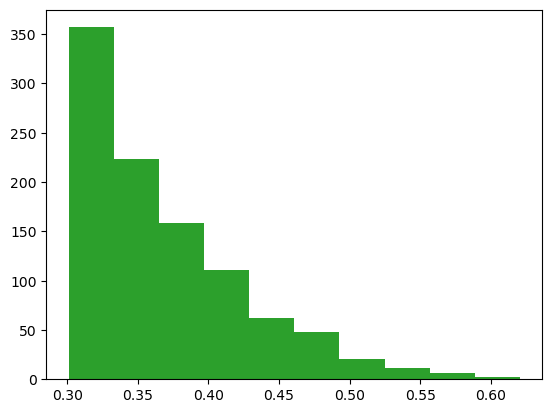

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist((d1[1].data['mean2F']-d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

In [115]:
d1 = fits.open('./test_10d.fts')
d2 = fits.open('./test_glitch_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

[44.852654 41.658066 39.179073 37.83506  37.467773] [14.147722 13.73482  13.731223 13.126192 13.116727]


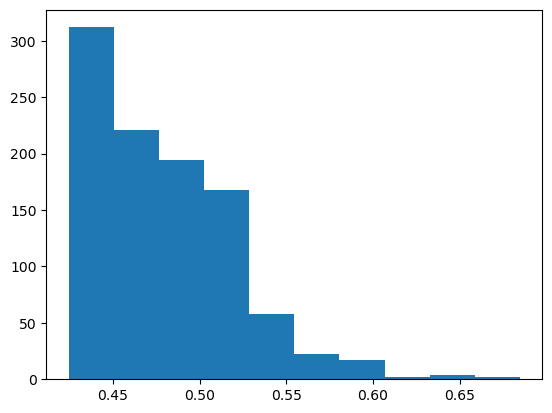

In [116]:
plt.hist((d1[1].data['mean2F']-d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

[23.370684 21.537443 20.785812 20.640606 19.693975] [44.852654 41.658066 39.179073 37.83506  37.467773]


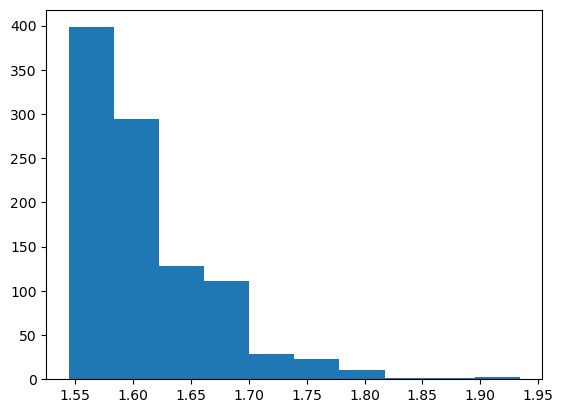

In [103]:
d1 = fits.open('./test.fts')
d2 = fits.open('./test_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

plt.hist((d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

[10.913886 10.561692 10.027872  9.731186  9.702815] [14.152377 13.760737 13.742172 13.471229 13.458594]


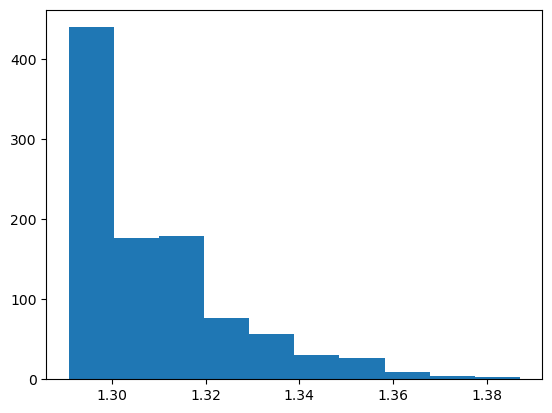

In [125]:
d1 = fits.open('./test_glitch.fts')
d2 = fits.open('./test_glitch_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

plt.hist((d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()